In [1]:
#Data Cleaning &/or Handling
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Data
store_data = pd.read_csv('Raw_Data/department_store_dataset.csv')
store_data.head()

,Salesperson Name,Department,Revenue,Revenue Goal,Gross Profit Marget,Profit Marget Goal,Date
0,Letícia Nascimento,Eletrônicos,4263.48,1290.04,0.14,0.18,2017-01-01
1,Ana Sousa,Eletrônicos,4892.33,3636.12,0.30,0.17,2017-01-01
2,Gustavo Martins,Eletrônicos,2854.06,1307.27,0.14,0.20,2017-01-01
3,Beatriz Santos,Vestuário,218.96,1436.86,0.20,0.17,2017-01-01
4,Camila Lima,Vestuário,1161.34,2491.02,0.24,0.14,2017-01-01


In [4]:
# Number of Rows & Columns
rows, column = store_data.shape
print("Total # of Rows:", rows)
print("Total # of Columns:", column)

Total # of Rows: 41629
Total # of Columns: 7


In [4]:
#Data information
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Salesperson Name     41629 non-null  object 
 1   Department           41629 non-null  object 
 2   Revenue              41629 non-null  float64
 3   Revenue Goal         41629 non-null  float64
 4   Gross Profit Marget  41629 non-null  float64
 5   Profit Marget Goal   41629 non-null  float64
 6   Date                 41629 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.2+ MB


In [5]:
#Converting Date type to Dateformat
store_data['Date'] = pd.to_datetime(store_data['Date'], format = '%Y-%m-%d')
store_data['Date']

0       2017-01-01
1       2017-01-01
2       2017-01-01
3       2017-01-01
4       2017-01-01
           ...    
41624   2022-12-31
41625   2022-12-31
41626   2022-12-31
41627   2022-12-31
41628   2022-12-31
Name: Date, Length: 41629, dtype: datetime64[ns]

In [6]:
#Verifying Changes in Date type
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Salesperson Name     41629 non-null  object        
 1   Department           41629 non-null  object        
 2   Revenue              41629 non-null  float64       
 3   Revenue Goal         41629 non-null  float64       
 4   Gross Profit Marget  41629 non-null  float64       
 5   Profit Marget Goal   41629 non-null  float64       
 6   Date                 41629 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.2+ MB


In [7]:
#Renaming Column Name
store_data = store_data.rename(columns={'Gross Profit Marget': 'Gross Profit Margin', 'Profit Marget Goal': 'Profit Margin Goal'})

store_data.head()

,Salesperson Name,Department,Revenue,Revenue Goal,Gross Profit Margin,Profit Margin Goal,Date
0,Letícia Nascimento,Eletrônicos,4263.48,1290.04,0.14,0.18,2017-01-01
1,Ana Sousa,Eletrônicos,4892.33,3636.12,0.30,0.17,2017-01-01
2,Gustavo Martins,Eletrônicos,2854.06,1307.27,0.14,0.20,2017-01-01
3,Beatriz Santos,Vestuário,218.96,1436.86,0.20,0.17,2017-01-01
4,Camila Lima,Vestuário,1161.34,2491.02,0.24,0.14,2017-01-01


In [6]:
#Finding Salesperson name

salesperson_name = store_data['Salesperson Name'].unique()

print(salesperson_name)

['Letícia Nascimento' 'Ana Sousa' 'Gustavo Martins' 'Beatriz Santos'
 'Camila Lima' 'Thiago Barbosa' 'Letícia Ribeiro' 'Enzo Nascimento'
 'Guilherme Santos' 'Vitória Ribeiro' 'Julia Araújo' 'Lucas Rodrigues'
 'Thiago Carvalho' 'Mateus Barbosa' 'Camila Carvalho' 'Diego Cardoso'
 'Jorge Santos' 'Raphael Silva' 'Caroline Reis']


In [8]:
#Segregating Total Revenue by Salesperson

salesperson_revenue = store_data.groupby('Salesperson Name')['Revenue','Revenue Goal'].sum().reset_index()

salesperson_revenue = salesperson_revenue.rename(columns={'Revenue': 'Total Revenue', 'Revenue Goal': 'Total Revenue Goal'})

salesperson_revenue.index = salesperson_revenue.index + 1

salesperson_revenue

,Salesperson Name,Total Revenue,Total Revenue Goal
1,Ana Sousa,7702639.45,7358273.20
2,Beatriz Santos,5753705.59,5608973.93
3,Camila Carvalho,8765589.89,8564016.22
4,Camila Lima,5673051.10,5524742.61
5,Caroline Reis,1260347.92,1239287.85
6,Diego Cardoso,5756049.42,5562223.62
7,Enzo Nascimento,9005932.42,8612466.25
8,Guilherme Santos,8907971.27,8553873.98
9,Gustavo Martins,7479814.35,7431991.88
10,Jorge Santos,6340905.18,6208718.05


In [9]:
#Difference between Total Revenue - Total Revenue Goal
salesperson_revenue['Revenue Less Target']=salesperson_revenue['Total Revenue']-salesperson_revenue['Total Revenue Goal']

salesperson_revenue

,Salesperson Name,Total Revenue,Total Revenue Goal,Revenue Less Target
1,Ana Sousa,7702639.45,7358273.20,344366.25
2,Beatriz Santos,5753705.59,5608973.93,144731.66
3,Camila Carvalho,8765589.89,8564016.22,201573.67
4,Camila Lima,5673051.10,5524742.61,148308.49
5,Caroline Reis,1260347.92,1239287.85,21060.07
6,Diego Cardoso,5756049.42,5562223.62,193825.80
7,Enzo Nascimento,9005932.42,8612466.25,393466.17
8,Guilherme Santos,8907971.27,8553873.98,354097.29
9,Gustavo Martins,7479814.35,7431991.88,47822.47
10,Jorge Santos,6340905.18,6208718.05,132187.13


In [10]:
#Data Vissualization

In [21]:
#Contribution of Each Department in Revenue
cont_dep = store_data.groupby(['Department'])['Revenue'].sum().reset_index()

fig = px.pie(cont_dep, values='Revenue', names='Department', title='Contribution of each Department in Revenue')

fig.update_layout(title_x=0.5)
fig.show()

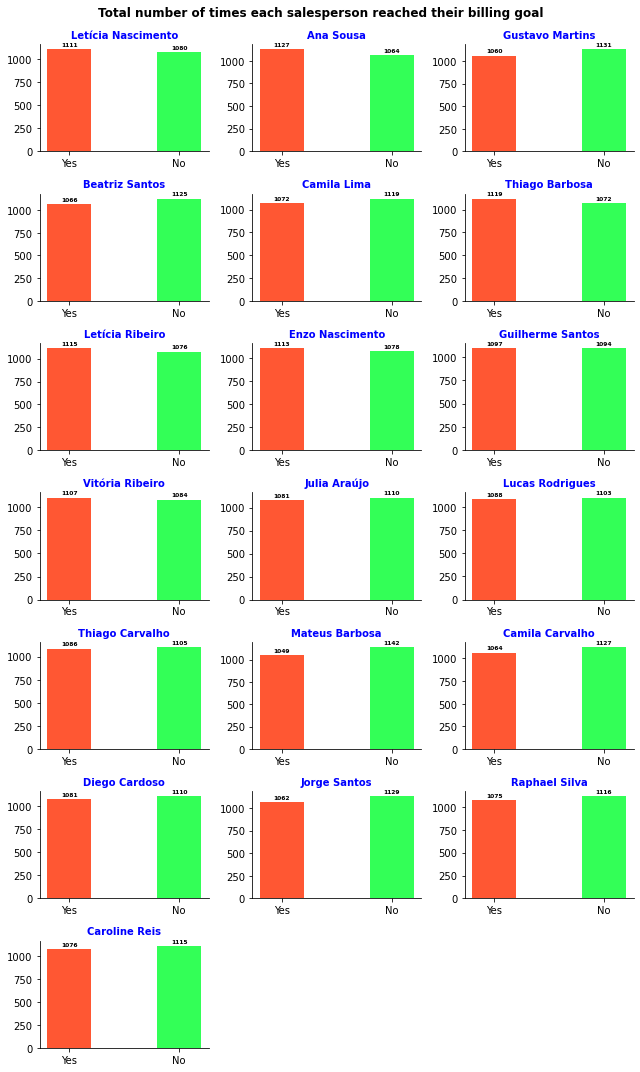

In [30]:
#Total # of times salesperson reaching their revenue goal

# Create a new column 'Target' to indicate if the revenue goal was met
store_data['Target'] = store_data['Revenue'] >= store_data['Revenue Goal']

# Get unique salesperson names
salespeople = store_data['Salesperson Name'].unique()

# Different color combinations
colors = ['#FF5733', '#33FF57', '#3366FF', '#FF33E1', '#FFFF33', '#FF33A6']

fig, ax = plt.subplots(7, 3, figsize=(9, 15))
ax = ax.flat

for i, salesperson_name in enumerate(salespeople):
    labels = ['Yes', 'No']
    values = [
        len(store_data[(store_data["Salesperson Name"] == salesperson_name) & (store_data['Target'] == True)]),
        len(store_data[(store_data["Salesperson Name"] == salesperson_name) & (store_data['Target'] == False)])
    ]
    rects = ax[i].bar(labels, height=values, width=0.4, color=colors)
    ax[i].set_title(f'{salesperson_name}', fontsize=10, fontweight='bold', color='blue')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

    def autolabel(rects, ax_index):
        for rect in rects:
            height = rect.get_height()
            ax[ax_index].annotate(text=f"{height}",
                                  xy=(rect.get_x() + rect.get_width() / 2, height - 10),
                                  xytext=(0, 3),
                                  textcoords='offset points',
                                  ha='center',
                                  va='bottom',
                                  size=6,
                                  weight='bold',
                                  color='black')

    autolabel(rects, i)

# Remove the empty subplots
for i in [19, 20]:
    fig.delaxes(ax[i])

fig.suptitle('Total number of times each salesperson reached their billing goal', fontsize=12, fontweight='bold',
             color='black', y=0.99)
fig.tight_layout()
plt.show()